In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers, initializers, activations
from tensorflow.keras.applications import resnet, resnet50
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
patient1 = pd.read_csv("patient1.csv")
train1a = patient1.iloc[1801:]
train1a

,y_stim,y_values,Fz,Cz,Pz,Oz,P3,P4,PO7,PO8
1801,1,1,-1.54260,-2.5696,1.52540,5.0904,-1.4038,2.20130,7.8312,5.17990
1802,1,1,0.88073,2.2769,7.28140,15.8900,5.1169,9.06760,17.5560,12.40500
1803,1,1,2.77720,6.0638,11.11400,23.7260,10.2230,13.86500,23.4590,17.79400
1804,1,1,3.62880,7.7626,12.20100,26.7340,12.6300,15.64100,24.1010,20.51600
1805,1,1,3.08910,6.9836,10.54500,24.4040,11.9350,14.23600,19.8980,20.19800
...,...,...,...,...,...,...,...,...,...,...
347699,0,0,-3.44090,8.1025,1.07480,-2.6160,6.4159,-6.77760,7.3028,-0.22362
347700,0,0,-4.97320,6.3426,0.21172,-3.6388,4.3905,-7.47270,8.5894,-1.73700
347701,0,0,-3.96510,5.7075,1.11050,-2.2678,3.8566,-5.28000,9.1372,-0.85581
347702,0,0,-0.55623,6.0152,3.32210,1.1043,4.5298,-0.67031,8.2750,2.10580


In [21]:
target_stim_0 = train1a[train1a['y_values'] == 0]
print("Number of Target_Stimulus_0 Detected: {}".format(len(target_stim_0)))

target_stim_1 = train1a[train1a['y_values'] == 1]
print("Number of Target_Stimulus_1 Detected: {}".format(len(target_stim_1)))

target_stim_2 = train1a[train1a['y_values'] == 2]
print("Number of Target_Stimulus_2 Detected: {}".format(len(target_stim_2)))

Number of Target_Stimulus_0 Detected: 211504
Number of Target_Stimulus_1 Detected: 111999
Number of Target_Stimulus_2 Detected: 22400


In [32]:
num_classes = np.unique(train1a['y_stim'])
print(num_classes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [33]:
train1a['y_stim'].value_counts()

0     211504
12     11200
11     11200
10     11200
9      11200
8      11200
7      11200
6      11200
5      11200
4      11200
3      11200
2      11200
1      11199
Name: y_stim, dtype: int64

In [23]:
target1_set = train1a[train1a['y_values'] == 1]
target1_set.describe()

,y_stim,y_values,Fz,Cz,Pz,Oz,P3,P4,PO7,PO8
count,111999.000000,111999.0,111999.000000,111999.000000,111999.000000,111999.000000,111999.000000,111999.000000,111999.00000,111999.000000
mean,6.642908,1.0,-0.176015,-0.188823,0.117545,0.374505,0.020492,0.088649,0.15833,0.205783
std,3.435251,0.0,9.510594,9.712084,10.664599,14.649770,10.220255,11.220967,14.76619,12.209061
min,1.000000,1.0,-60.215000,-61.332000,-64.313000,-70.889000,-55.254000,-59.413000,-63.19500,-60.033000
25%,4.000000,1.0,-6.184300,-6.326450,-6.521600,-8.679900,-6.357400,-7.020350,-9.34685,-7.427950
50%,7.000000,1.0,-0.263060,-0.274130,-0.036740,-0.124390,-0.141680,-0.110360,-0.23121,-0.091383
75%,10.000000,1.0,5.771750,5.839150,6.596250,8.947000,6.188600,7.017750,9.24845,7.519250
max,12.000000,1.0,49.748000,46.350000,56.949000,78.546000,55.297000,54.101000,71.67800,60.897000


In [24]:
target2_set = train1a[train1a['y_values'] == 2]
target2_set.describe()

,y_stim,y_values,Fz,Cz,Pz,Oz,P3,P4,PO7,PO8
count,22400.000000,22400.0,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,5.785714,2.0,-0.678739,-0.497131,-0.173309,-0.018900,-0.130019,0.082121,0.044560,0.377536
std,3.447199,0.0,9.376594,9.627957,10.470291,14.426598,10.101070,11.059892,14.649878,11.973205
min,1.000000,2.0,-43.163000,-38.152000,-42.877000,-55.577000,-42.852000,-44.325000,-62.501000,-47.679000
25%,3.000000,2.0,-6.713650,-6.657950,-6.734400,-9.181200,-6.557625,-7.102025,-9.558550,-7.315175
50%,6.500000,2.0,-0.701580,-0.599785,-0.262805,-0.534845,-0.257300,-0.055393,-0.223690,0.022884
75%,9.000000,2.0,5.265825,5.556500,6.305600,8.476150,6.116250,7.008925,9.010050,7.705200
max,12.000000,2.0,37.583000,39.768000,43.420000,66.497000,40.331000,51.948000,65.193000,54.934000


<BarContainer object of 3 artists>

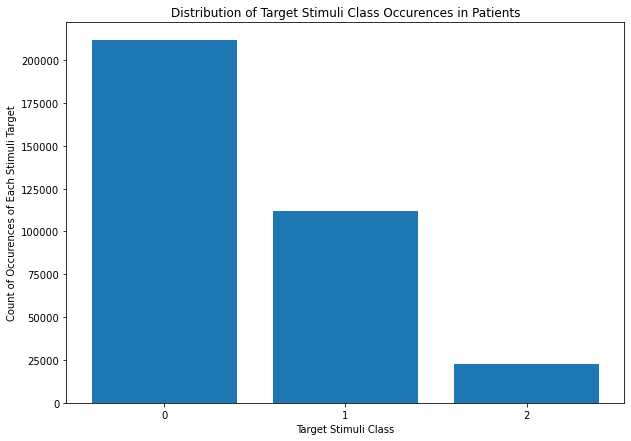

In [27]:
count = [211504, 111999, 22400]
target_stimuli = ["0", "1", "2"]

plt.figure(figsize = (10, 7))
plt.title("Distribution of Target Stimuli Class Occurences in Patients")
plt.xlabel("Target Stimuli Class")
plt.ylabel("Count of Occurences of Each Stimuli Target")
plt.bar(target_stimuli, count)